In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
  
# Define a dictionary containing sales data 
data = {'Months':[1,2,3,4,5,6,7,8,9,10,11,12], 
        'Sales':[5384,8081,10282,9156,6118,9139,12460,10717,7825,9693,15177,10990]
       }

df = pd.DataFrame(data)

print(df)

    Months  Sales
0        1   5384
1        2   8081
2        3  10282
3        4   9156
4        5   6118
5        6   9139
6        7  12460
7        8  10717
8        9   7825
9       10   9693
10      11  15177
11      12  10990


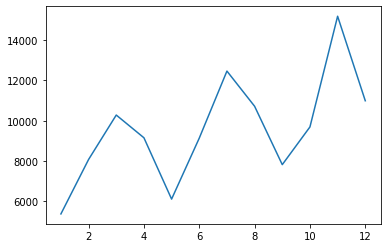

In [114]:
months = df['Months']
sales = df['Sales']

plt.plot(months, sales)
plt.show()
#Trend: Upward overall
#Seasonality: Regular pattern of up and down with a cycle of 4 months

In [115]:
df['MA3'] = df['Sales'].rolling(window=3).mean()

for x in range(0, 4):
    tmonths = df['Months']
    tma = df['MA3']
    length = len(df.index)
    newMonth = length+1
    newma = np.round((tma[length-1] + tma[length-2] + tma[length-3]) / 3,1)
    newRow = pd.DataFrame(np.array([newma]), columns=['MA3'])
    newRow['Months'] = np.array([newMonth])
    df = df.append(newRow,ignore_index = True)
print(df)

             MA3  Months    Sales
0            NaN       1   5384.0
1            NaN       2   8081.0
2    7915.666667       3  10282.0
3    9173.000000       4   9156.0
4    8518.666667       5   6118.0
5    8137.666667       6   9139.0
6    9239.000000       7  12460.0
7   10772.000000       8  10717.0
8   10334.000000       9   7825.0
9    9411.666667      10   9693.0
10  10898.333333      11  15177.0
11  11953.333333      12  10990.0
12  10754.400000      13      NaN
13  11202.000000      14      NaN
14  11303.200000      15      NaN
15  11086.500000      16      NaN


/home/ken/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Text(0.5, 1.0, 'Moving Average (k=3)')

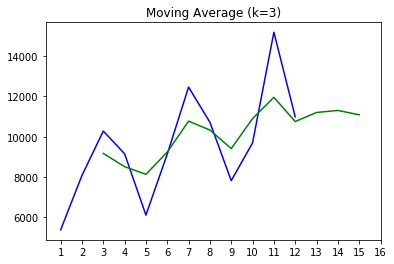

In [116]:
plt.plot(df['Months'],df['Sales'], color='blue')
plt.plot(range(3,16),df['MA3'][3:16], color='green')
plt.xticks(df['Months'])
plt.title('Moving Average (k=3)')

In [117]:
print(df['Sales'])

0      5384.0
1      8081.0
2     10282.0
3      9156.0
4      6118.0
5      9139.0
6     12460.0
7     10717.0
8      7825.0
9      9693.0
10    15177.0
11    10990.0
12        NaN
13        NaN
14        NaN
15        NaN
Name: Sales, dtype: float64


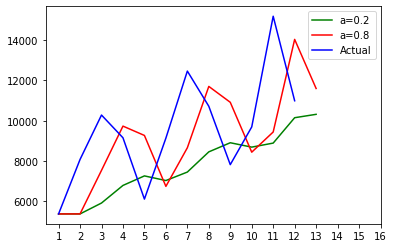

In [118]:
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(df['Sales']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')

fit2 = ExponentialSmoothing(df['Sales']).fit(smoothing_level=0.8,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.8$')

plt.plot(range(1,17), fit1.fittedvalues, label='a=0.2', color="green")
plt.plot(range(1,17), fit2.fittedvalues, label='a=0.8', color='red')
plt.plot(df['Months'],df['Sales'], label="Actual", color='blue')
plt.legend()
plt.xticks(df['Months'])
plt.show()

In [121]:
season = np.array([1,2,3])

#first season average (months 1 - 4)
season1 = df.iloc[0:4,2].mean(axis=0)

#second season average (months 5 - 8)
season2 = df.iloc[4:8,2].mean(axis=0)

#second season average (months 9 - 12)
season3 = df.iloc[8:12,2].mean(axis=0)

season_avg = np.array([season1,season2,season3])
fit = np.polyfit(season,season_avg,3)
poly = np.poly1d(fit)
average_predict = poly(4)
display(average_predict)

/home/ken/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


12038.807805355975

In [4]:
import pandas as pd
error = pd.DataFrame({"Period":[13, 14, 15, 16], 
                   "Sales":[8050, 11300, 15500, 13000]})
error.mad(axis = 0)

AttributeError: 'numpy.ndarray' object has no attribute 'mad'